In [ ]:
# importing pandas
import pandas as pd

# Load CSV
df = pd.read_csv("mock_kaggle.csv")

# Force-clean column names
df.columns = [col.strip().lower() for col in df.columns]
print("🧼 Cleaned column names:", df.columns.tolist())

df = df.rename(columns={
    "data": "ds",
    "venda": "y"
})

print(df)

df["ds"] = pd.to_datetime(df["ds"])
print(df.head())
print(df.dtypes)


🧼 Cleaned column names: ['data', 'venda', 'estoque', 'preco']
             ds    y  estoque  preco
0    2014-01-01    0     4972   1.29
1    2014-01-02   70     4902   1.29
2    2014-01-03   59     4843   1.29
3    2014-01-04   93     4750   1.29
4    2014-01-05   96     4654   1.29
..          ...  ...      ...    ...
932  2016-07-27   98     3179   2.39
933  2016-07-28  108     3071   2.39
934  2016-07-29  128     4095   2.39
935  2016-07-30  270     3825   2.39
936  2016-07-31  183     3642   2.39

[937 rows x 4 columns]
          ds   y  estoque  preco
0 2014-01-01   0     4972   1.29
1 2014-01-02  70     4902   1.29
2 2014-01-03  59     4843   1.29
3 2014-01-04  93     4750   1.29
4 2014-01-05  96     4654   1.29
ds         datetime64[ns]
y                   int64
estoque             int64
preco             float64
dtype: object


In [ ]:
from prophet import Prophet

# Initialize model
model = Prophet()

# Fit the model to the cleaned data
model.fit(df)

# Create a future dataframe with 90 extra days
future = model.make_future_dataframe(periods=90)

# Generate forecast
forecast = model.predict(future)

# View forecasted values
# yhat: predicted sales
# yhat_lower, yhat_upper: confidence intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjz60n6_/lbjn4b21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjz60n6_/rx90bxkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41855', 'data', 'file=/tmp/tmpdjz60n6_/lbjn4b21.json', 'init=/tmp/tmpdjz60n6_/rx90bxkt.json', 'output', 'file=/tmp/tmpdjz60n6_/prophet_modelkdmaa2ul/prophet_model-20250423053329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
1022 2016-10-25  205.382612  121.735555  286.895790
1023 2016-10-26  233.478150  148.245318  318.226689
1024 2016-10-27  221.667960  138.699704  305.300660
1025 2016-10-28  236.934062  154.919289  327.743058
1026 2016-10-29  291.452296  208.733626  377.798261


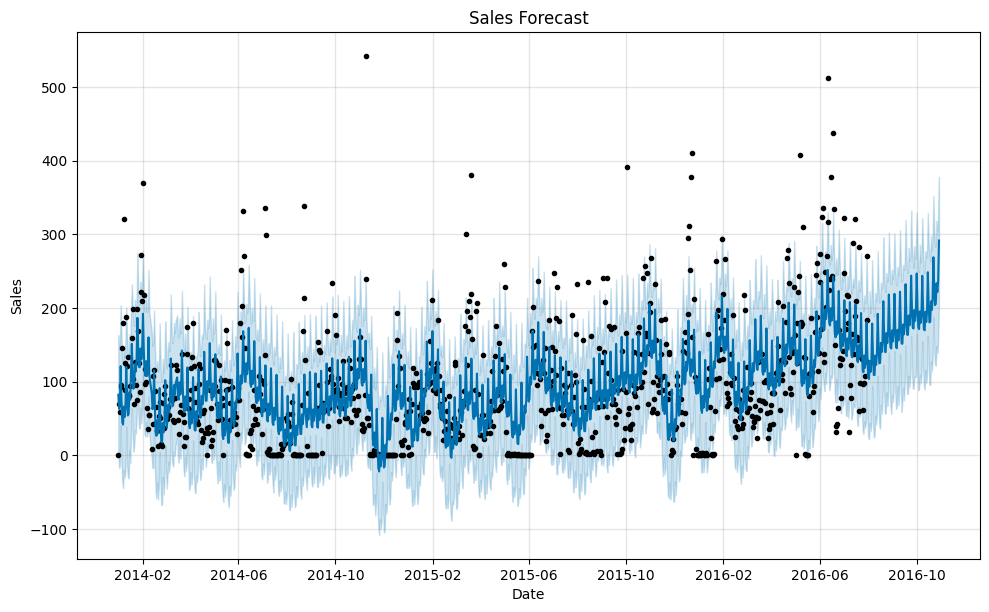

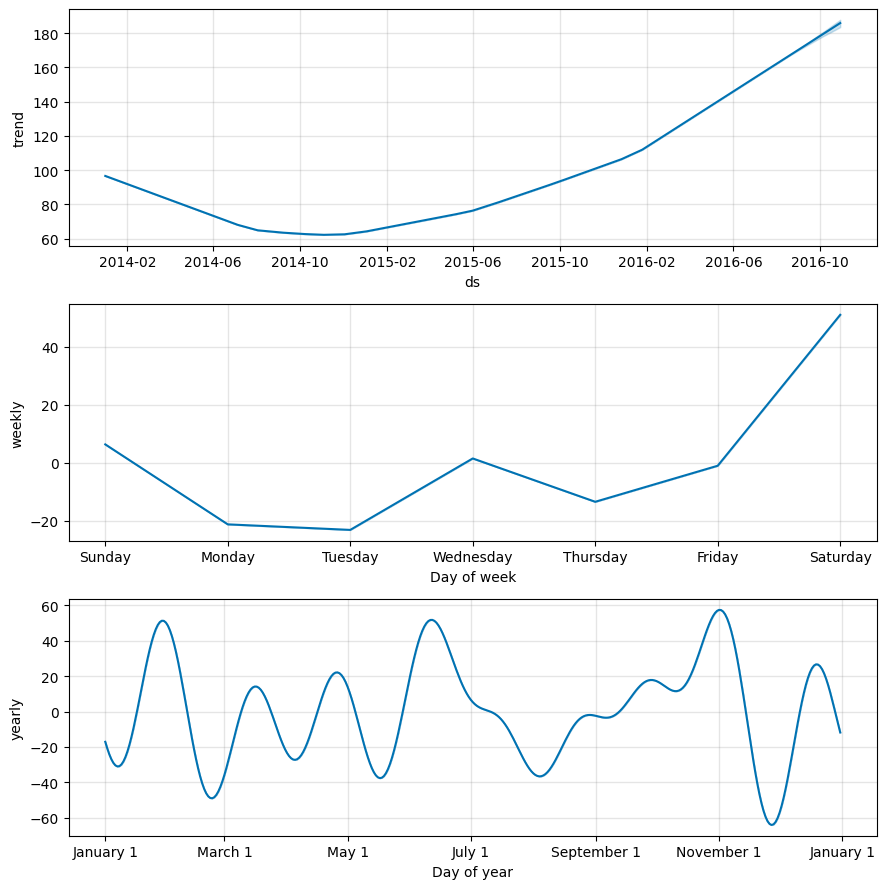

In [ ]:
import matplotlib.pyplot as plt

# Forecast plot
model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Seasonality/trend components
model.plot_components(forecast)
plt.show()


# Export to CSV

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_results.csv", index=False)